# Chapter 10 -- Groupby

## Topics Covered:

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Setting-Display-Options">Setting Display Options</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Read-'pickled'-DataFrame">Read 'pickled' DataFrame</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Create-GroupBy-Object">Create GroupBy Object</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#GroupBy-with-Aggregations">GroupBy with Aggregations</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Understanding-Binning">Understanding Binning</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Defining-Functions">Defining Functions</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Applying-Functions-to-Groups">Applying Functions to Groups</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Applying-Transformations-to-Groups">Applying Transformations to Groups</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Top/Bottom-N-processing">Top/Bottom N processing</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Resources">Resources</a>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index
from IPython.display import Image

## Setting Display Options

For this notebook, display floats with a field width of 20 and two places left of the decimal.

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format

## Read 'pickled' DataFrame

The pd.read_pickle() function loads the Lending Club Data Frame created in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Save-to-Disk"> Chapter 12, Additional Data Handling</a>.  The pd.read_pickle() method is documented <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html">here</a>. 

In [3]:
loans = pd.read_pickle('lending_club.pkl')
loans.shape

(42595, 24)

In [4]:
loans.set_index('id', inplace=True)

Display attribute information for the 'loans' DataFrame.

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42595 entries, 872482 to 1064908
Data columns (total 23 columns):
mem_id         42595 non-null int64
ln_amt         42595 non-null int64
term           42595 non-null object
rate           42595 non-null float64
m_pay          42595 non-null float64
grade          42595 non-null object
sub_grd        42595 non-null object
emp_len        42595 non-null object
own_rnt        42595 non-null object
income         42595 non-null float64
ln_stat        42595 non-null object
purpose        42595 non-null object
state          42595 non-null object
dti            42595 non-null float64
delinq_2yrs    42566 non-null float64
ln_fst         42566 non-null object
inq_6mnth      42566 non-null float64
open_acc       42566 non-null float64
revol_bal      42595 non-null int64
revol_util     42595 non-null float64
ln_plcy        42595 non-null bool
dti_cat        42595 non-null category
inc_cat        42595 non-null int8
dtypes: bool(1), category(1), 

## Create GroupBy Object

Create the GroupBy object 'grp_grd' using the key column 'grade'. It does not compute anything until an operation is applied to the resulting groups.  One of the simplest aggregation method applied is the len() function used to return the number of groups. The GroupBy: split-apply-combine doc for panda is located <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html"> here</a>.

In [6]:
grp_grd = loans.groupby('grade')
print(type(grp_grd))
print(len(grp_grd))

<class 'pandas.core.groupby.DataFrameGroupBy'>
7


The GroupBy object has a number of aggregation methods which can be applied to individual group levels, for example .mean().

In [7]:
grp_grd['income'].mean()

grade
A              66,711.88
B              67,918.69
C              68,199.96
D              68,277.02
E              75,889.16
F              83,095.53
G              93,055.82
Name: income, dtype: float64

Even if we do not use the GroupBy object created above, we can still render the average income for each level of the column 'grade' by passing the DataFrame column name.  In this case, 'income' grouped by grade to calculate the group mean.

In [8]:
loans.groupby('grade')['income'].mean()

grade
A              66,711.88
B              67,918.69
C              68,199.96
D              68,277.02
E              75,889.16
F              83,095.53
G              93,055.82
Name: income, dtype: float64

Not surprisingly, the pandas GroupBy logic is analogous to SQL's group by syntax.  

````
    /******************************************************/
    /* c10_groupby_grade.sas                              */
    /******************************************************/
    6       proc sql;
    7       select grade label = 'Grade',
    8              mean(income) label = 'Mean Income'
    9                           
    10       from df
    11       group by grade
    12       order by mean;
````

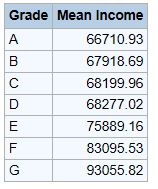

In [9]:
  Image(filename='Anaconda3\\output\\income_groupby_grade.JPG')  

## GroupBy with Aggregations

We can use the .aggregate() attribute to apply multiple methods to the group levels.

In [10]:
grp_grd['income'].aggregate(['mean', 'std', 'count'])

,mean,std,count
grade,,,
A,"66,711.88","54,049.48",10202
B,"67,918.69","60,705.94",12408
C,"68,199.96","86,568.69",8747
D,"68,277.02","49,031.33",6025
E,"75,889.16","55,312.08",3401
F,"83,095.53","63,771.87",1300
G,"93,055.82","73,522.11",512


The analog SAS program using the MEAN, STD, and COUNT function to produce the same results.

````
    /******************************************************/
    /* c10_groupby_grade_stats.sas                        */
    /******************************************************/
    3       proc sql;
    4       select grade label = 'Grade'
    5              , mean(income) label = 'Mean Income' as mean
    6              , std(income) label = 'Standard Deviation'
    7              , count(income) label = 'Count'
    8       
   9       from df
   10       group by grade
   11       order by mean;
````

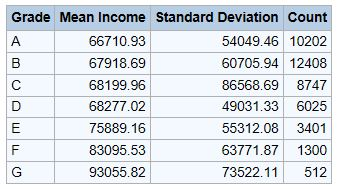

In [11]:
  Image(filename='Anaconda3\\output\\groupby_income_stats.JPG')  

We can requests multiple columns as part of the GroupBy operation.  In this case, loans['income'] and loans['dti'] (debt-to-income ratio).  The .describe() attribute is applied to each of the group levels.  The .stack() .and unstack() attributes are discussed <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2006%20--%20Hierarchical%20Indexing.ipynb#stack()-and-unstack()-methods"> here </a>.

In [12]:
grp_grd['income', 'dti'].describe().unstack()

income                                            \
                     count                 mean                  std   
grade                                                                  
A                10,202.00            66,711.88            54,049.48   
B                12,408.00            67,918.69            60,705.94   
C                 8,747.00            68,199.96            86,568.69   
D                 6,025.00            68,277.02            49,031.33   
E                 3,401.00            75,889.16            55,312.08   
F                 1,300.00            83,095.53            63,771.87   
G                   512.00            93,055.82            73,522.11   

                                                                      \
                       min                  25%                  50%   
grade                                                                  
A                 3,300.00            40,000.00            57,632.00   
B                 2,000.00            40,000.00            57,996.00   
C                 4,000.00            40,000.00            56,000.00   
D                 4,000.00            40,000.00            58,000.00   
E                 4,200.00            45,000.00            62,000.00   
F                 7,280.00            50,000.00            70,679.00   
G                 1,896.00            52,000.00            75,000.00   

                                                                 dti  \
                       75%                  max                count   
grade                                                                  
A                80,000.00         1,900,000.00            10,202.00   
B                80,497.00         3,900,000.00            12,408.00   
C                80,000.00         6,000,000.00             8,747.00   
D                82,000.00         1,200,000.00             6,025.00   
E                90,000.00           750,000.00             3,401.00   
F               100,000.00         1,440,000.00             1,300.00   
G               110,000.00           725,000.00               512.00   

                                                                      \
                      mean                  std                  min   
grade                                                                  
A                    12.04                 7.01                 0.00   
B                    13.39                 6.66                 0.00   
C                    13.85                 6.50                 0.00   
D                    13.98                 6.43                 0.00   
E                    14.18                 6.53                 0.00   
F                    14.65                 6.55                 0.00   
G                    15.69                 7.29                 0.00   

                                                                      \
                       25%                  50%                  75%   
grade                                                                  
A                     6.46                11.50                17.10   
B                     8.31                13.51                18.62   
C                     8.97                14.05                18.99   
D                     9.16                14.31                19.25   
E                     9.36                14.62                19.60   
F                     9.81                15.16                19.76   
G                     9.89                15.96                21.33   

                            
                       max  
grade                       
A                    29.99  
B                    29.95  
C                    29.78  
D                    29.63  
E                    29.70  
F                    29.95  
G                    29.96

The GroupBy .size() attribute returns a count of the number of values for each level.  Of course, this same information is available as the loans['count'] column from the operation executed in the cell above.

In [13]:
grp_grd.size()

grade
A    10202
B    12408
C     8747
D     6025
E     3401
F     1300
G      512
dtype: int64

The analog SAS program.

````
    /******************************************************/
    /* c10_groupby_grade_count.sas                        */
    /******************************************************/
    21       proc sql;
    22       select grade
    23              ,count(grade) label='N'
    24       from df
    25       group by grade;
    26       quit;
````

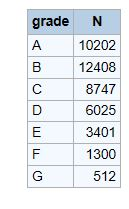

In [14]:
  Image(filename='Anaconda3\\output\\groupby_grade_count.JPG')  

The .get_group attribute returns information about a particular group level.  

In [15]:
grp_grd.get_group('G').mem_id.count()

512

````
    /******************************************************/
    /* c10_groupby_grade_where.sas                        */
    /******************************************************/
    32       proc sql;
    33       select count(grade) label='N'
    34       from df
    35       where grade = 'G'
    36       group by grade;
    37       
    38       quit;
````

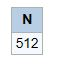

In [16]:
  Image(filename='Anaconda3\\output\\groupby_grade_G.JPG') 

We can chain attributes together to produce the desired results.  Details for sorting values in DataFrames are discussed in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Sort-and-Sort-Sequences"> Sort and Sort Sequences</a> in Chapter 12--Additional Data Handling.

In [17]:
grp_grd.income.mean().sort_values(ascending=False)

grade
G              93,055.82
F              83,095.53
E              75,889.16
D              68,277.02
C              68,199.96
B              67,918.69
A              66,711.88
Name: income, dtype: float64

The analog SAS PROC SQL example.

````
    /******************************************************/
    /* c10_groupby_grade_orderby.sas                      */
    /******************************************************/
    44       proc sql;
    45       select grade
    46              ,mean(income) label='Mean Income'
    47       from df
    48       group by grade
    49       order by 2 descending;
    50       
    51       quit;
````

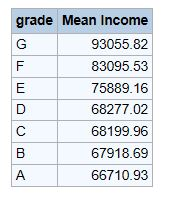

In [18]:
  Image(filename='Anaconda3\\output\\groupby_grade_income_descend.JPG')

## Understanding Binning

In this section, we want to create output displaying the statistics, N, mean, and standard deviation for income by binning the values for loan to debt ratio (loans['dti']) into the categories, 'low', 'medium', 'high'. 

Start by displaying the min and max values for the loans['dti'] column to determine 'bucket' sizes.

In [19]:
print(loans.dti.min())
print(loans.dti.max())

0.0
29.99


Return the count of continous values in the column loans['dti'].

In [20]:
loans.dti.count()

42595

Use the pd.cut() method to bin continuous vales into discreet values, or categories.  Additional examples for pd.cut() are found in the section "Binning Continuous Values" in Chapter 12, located <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Binning-Continuous-Values"> here</a>. pd.cut is analogous to user defined SAS formats. 

In [21]:
bins = [0.0, 10.0, 20.0, 30.0]
names=['Low', 'Medium', 'High']

Create the new column loans['dti_cat'] in the loans DataFrame.

In [22]:
loans['dti_cat'] = pd.cut(loans['dti'], bins, labels=names)

We expect the number of values for both the value count for loans['dti'] and categorical values in the  loans['dti_cat'] column to be the same.  

In [23]:
loans.dti.count() == loans.dti_cat.count()

False

By default, the pd.cut() method sets the right= argument to True.  From the doc, "Indicates whether the bins include the rightmost edge or not. If right == True (the default), then the bins [1,2,3,4] indicate (1,2], (2,3], (3,4]".

In [24]:
loans['dti_cat'] = pd.cut(loans['dti'], bins, right=False, labels=names)

In [25]:
loans.dti.count() == loans.dti_cat.count()

True

## Defining Functions 

Define the function 'stats' which returns the desired statistics, mean, std (standard deviation), and count (N).  The type() method returns the object's type.

In [26]:
def stats(grp):
    return {'mean': grp.mean(), 'std': grp.std(), 'count':grp.count()}
type(stats)

function

## Applying Functions to Groups

Putting these together, the 'income' column is grouped-by the loans['dti_cat'] column displaying the rows labeled, 'Low', 'Medium', and 'High'.  The .apply() attribute applies the 'stats' function to create the columns, 'count', 'mean', 'std'.  The .unstack() attribute places the output in a 'tall and skinny' format.

In [27]:
loans['income'].groupby(loans['dti_cat']).apply(stats).unstack()

,count,mean,std
dti_cat,,,
Low,"14,067.00","77,863.73","97,182.50"
Medium,"20,295.00","67,121.00","38,976.54"
High,"8,233.00","59,210.71","33,334.58"


The analog SAS program uses PROC SQL to find min and man for the 'dti' column, performs the aggregation funtions, and uses the CASE statement to define 'bins' for the new column 'dti_cat'.

````
    /******************************************************/
    /* c10_groupby_dti_cat.sas                            */
    /******************************************************/
    29      proc sql;
    30      select min(dti) as dit_min
    31            ,max(dti) as dti_max
    32      from df;
    33      
    34      select count(income) as count
    35            ,mean(income) as mean
    36            ,std(income) as std
    37            ,
    38      case
    39         when dti < 10 then       'Low'
    40         when 10 <= dti < 20 then 'Medium'
    41         else                     'High'
    42      end as dti_cat
    43      from df
    44      group by calculated dti_cat;
    45      quit;
````

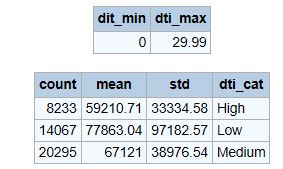

In [28]:
Image(filename='Anaconda3\\output\\groupby_dti_cat_income.JPG') 

For another example define the 'max_min' function for calculating a range and apply it income values grouped by loans['dti_cat'] levels nested inside loans['grade'] levels.

In [29]:
 def max_min(x):
        return x.max() - x.min()
dti_grd_grp = loans.groupby(['grade', 'dti_cat'])
dti_grd_grp.income.agg(max_min).unstack()

dti_cat,Low,Medium,High
grade,,,
A,"1,896,700.00","377,000.00","234,000.00"
B,"3,898,000.00","483,400.00","241,912.00"
C,"5,996,000.00","335,200.00","1,245,200.00"
D,"1,195,200.00","524,000.00","519,200.00"
E,"745,800.00","351,600.00","308,600.00"
F,"1,425,600.00","342,720.00","218,724.00"
G,"715,400.00","598,104.00","235,800.00"


The range for the income values is large with extremes in both directions.  Rather than 'bucketing' these values into arbitrary sizes, another approach is to place values into deciles.  

In [30]:
print(loans.income.min())
print(loans.income.max())

1896.0
6000000.0


Similar to the pd.cut() method is the pd.qcut() method for creating deciles which is documented <a href="http://pandas.pydata.org/pandas-docs/version/0.15.0/generated/pandas.qcut.html"> here</a>.  The operation below creates the new column loans['inc_cat_dec'] for the 'loans' DataFrame.

In [31]:
loans['inc_cat_dec'] = pd.qcut(loans['income'], q=10)

Using the income deciles, return a count for each level in descending sorted order.

In [32]:
pd.value_counts(loans['inc_cat_dec'].sort_values())

[1896, 30000]          5088
(75600, 90000]         4436
(50004, 59000]         4309
(44500, 50004]         4306
(37000, 44500]         4265
(116690.4, 6000000]    4260
(65600, 75600]         4253
(59000, 65600]         4163
(90000, 116690.4]      4082
(30000, 37000]         3433
Name: inc_cat_dec, dtype: int64

The bin value ranges are a bit unwieldy.  An alternative is to map the bin value ranges into category codes.

In [33]:
loans['inc_cat_dec'] = pd.qcut(loans['income'].values, 10).codes
pd.value_counts(loans['inc_cat_dec'].sort_values())

0    5088
7    4436
4    4309
3    4306
2    4265
9    4260
6    4253
5    4163
8    4082
1    3433
Name: inc_cat_dec, dtype: int64

In [34]:
loans.income.count() == loans.inc_cat_dec.count()

True

With SAS, the traditional method for creating deciles is through PROC RANK as illustrated below.

````
    /******************************************************/
    /* c10_default_deciles.sas                            */
    /******************************************************/
    98      proc rank data=df groups=10 out=r_df;
    99           var income;
    100           ranks r_income;
    NOTE: Data set "WORK.r_df" has 42595 observation(s) and 23 variable(s)
    101      
    102      proc sql;
    103         select count(r_income) label='Income Deciles' as count
    104      from r_df
    105      group by r_income
    106      order by count descending;
    107      quit;
````

However, the **default** results between pd.qcut() method and PROC RANK are different.

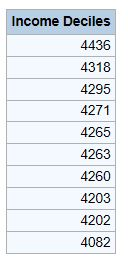

In [35]:
 Image(filename='Anaconda3\\output\\default_income_deciles.JPG') 

The difference are attributable to the method by which PROC RANK handles 'tied' values.  PROC RANK provides the TIES= option and when set to LOW, the results are the same as the pd.qcut() method.  You can read more about how PROC RANK treats tied values <a href="https://support.sas.com/documentation/cdl/en/proc/65145/HTML/default/viewer.htm#n1pe8iekjrnnfin1hdw34ik02tcw.htm#p1lkzb8a7dpbkxn1k6bspo5f9680"> here</a>.

````
    /******************************************************/
    /* c10_deciles_ties_low.sas                           */
    /******************************************************/
57      proc rank data=df groups=10 ties=low out=r_df;
58           var income;
59           ranks r_income;
NOTE: Data set "WORK.r_df" has 42595 observation(s) and 23 variable(s)
60      
61      proc sql;
62         select count(r_income) label='Income Deciles' as count
63      from r_df
64      group by r_income
65      order by count descending;
66      quit;
````

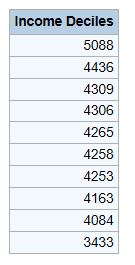

In [36]:
 Image(filename='Anaconda3\\output\\deciles_ties_low.JPG') 

Use the created column loans['inc_cat_dec'] for income deciles to display statistics provided by the 'stats' function created above to return count, mean, and standard deviation.  

In [37]:
 loans['income'].groupby(loans['inc_cat_dec']).apply(stats).unstack()

,count,mean,std
inc_cat_dec,,,
0,"5,088.00","23,505.59","5,733.08"
1,"3,433.00","34,240.73","1,863.40"
2,"4,265.00","40,730.02","1,888.30"
3,"4,306.00","47,674.11","1,948.03"
4,"4,309.00","54,526.42","2,339.30"
5,"4,163.00","62,090.00","2,108.14"
6,"4,253.00","71,171.32","2,872.85"
7,"4,436.00","83,137.04","4,291.91"
8,"4,082.00","101,756.61","6,990.66"


pandas crosstabs is another method for accessing GroupBy processing using two factors, or categorical columns.  In the example below, the values= argument is monthly payments loans['income'] column using the aggregation function count.  Additional crosstab examples are found in the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Crosstabs"> crosstabs</a> section of Chapter, 12--Additional Data Handling.

In [38]:
 pd.crosstab([loans.dti_cat], [loans.inc_cat_dec], \
             values=loans.income, aggfunc='count', margins=True, colnames=['Income Deciles'], rownames=['Debt/Income Ratio'])

Income Deciles,0,1,2,3,4,5,6,7,8,9,All
Debt/Income Ratio,,,,,,,,,,,
Low,"1,882.00",963.00,"1,210.00","1,281.00","1,181.00","1,266.00","1,313.00","1,476.00","1,493.00","2,002.00","14,067.00"
Medium,"2,179.00","1,602.00","2,034.00","2,058.00","2,165.00","2,074.00","2,129.00","2,217.00","1,988.00","1,849.00","20,295.00"
High,"1,027.00",868.00,"1,021.00",967.00,963.00,823.00,811.00,743.00,601.00,409.00,"8,233.00"
All,"5,088.00","3,433.00","4,265.00","4,306.00","4,309.00","4,163.00","4,253.00","4,436.00","4,082.00","4,260.00","42,595.00"


The analog SAS program uses PROC FREQ.

````    
    /******************************************************/
    /* c10_pd.crosstabs.sas                               */
    /******************************************************/
    5      proc rank data=df groups=10 ties=low out=r_df;
    6          var income;
    7           ranks r_income;
    8
    9      data tables;
    10         set r_df (keep = r_income dti);
    11      length dti_cat $ 6;
    12      if dti < 10 then dti_cat = 'Low';
    13          else if dti < 20 then dti_cat = 'Medium';
    14         else dti_cat = 'High';
    15      
    16      proc freq data=tables order=formatted;
    17      tables dti_cat * r_income /nocol nocum norow nopercent;
````

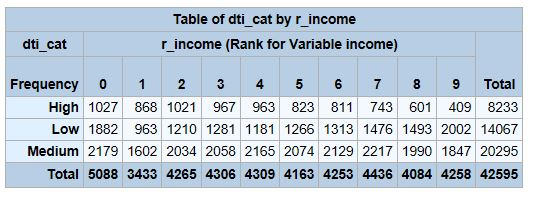

In [39]:
 Image(filename='Anaconda3\\output\\pd_crosstab.JPG') 

## Applying Transformations to Groups

A fairly common pattern is standardization and transformation of values.  In the cell below, the new column loans['iz_all'] is added to the 'loans' DataFrame.  It computes a zscore by subtracting the mean value for income from income and dividing by the standard deviation.   

In [40]:
loans['iz_all'] = (loans.income - loans.income.mean()) / loans.income.std() 

In [41]:
loans['iz_all'].isnull().sum()

0

However, we want to calculate zscores by deciles rather than the overall mean for income.  Start by creating the grouper for the loans['inc_cat'] column which is the deciles created with the pd.qcut() method above.

In [42]:
grp_inc_cat = loans.groupby('inc_cat')

Create the zcore function using lambda as an anonymous function.

In [43]:
zscore = lambda x: (x - x.mean()) / x.std()
type(zscore)

function

Using the 'grp_inc_cat' grouper created above, call the .transform() attribute to apply the zscore function and assign the results to a new DataFrame called 't_loans'.

In [44]:
t_loans = grp_inc_cat.transform(zscore)

The zscore function is applied to all of the numeric columns in the 'loans' DataFrame, so extract the transformed t_loans['income'] column from the 't_loans' DataFrame and assign it as the column loans['iz_grp'] in the 'loans' DataFrame.

In [45]:
loans['iz_grp'] = t_loans['income']

Display the transformed income values.

In [46]:
print(loans['iz_all'].sort_values(ascending=False).head(10), 
      loans['iz_grp'].sort_values(ascending=False).head(10))

id
513542                  92.58
519954                  59.80
269818                  30.76
611872                  28.58
884755                  26.74
502114                  21.40
458760                  21.40
453667                  20.18
830027                  18.43
603818                  17.65
Name: iz_all, dtype: float64 id
513542                  38.15
519954                  24.39
269818                  12.21
611872                  11.29
884755                  10.52
502114                   8.28
458760                   8.28
453667                   7.77
830027                   7.04
468400                   6.71
Name: iz_grp, dtype: float64


We would like to display the transformed income values side-by-side.  Create the new DataFrame 'prt' by extracting the loans['iz_all'] column (income zscores computed with column mean) and the loans['iz_grp'] (income zscores computed with the group mean). 

In [47]:
prt = loans[['iz_all', 'iz_grp']]
type(prt)

pandas.core.frame.DataFrame

Provide descriptive column names.

In [48]:
prt.columns = ['zscore w/ overall mean','zscore with group mean']

Display the transformed income values.

In [49]:
prt.sort_values('zscore w/ overall mean', ascending=False).head(10)

,zscore w/ overall mean,zscore with group mean
id,,
513542,92.58,38.15
519954,59.80,24.39
269818,30.76,12.21
611872,28.58,11.29
884755,26.74,10.52
502114,21.40,8.28
458760,21.40,8.28
453667,20.18,7.77
830027,18.43,7.04


The analog SAS program combines the creating of income deciles using PROC RANK and PROC SQL to calculate income zscores based on overall mean and income decile group mean.

````
    /******************************************************/
    /* c10_zscore_all_bygroup.sas                         */
    /******************************************************/
    48      proc rank data=df groups=10 ties=low out=r_df;
    49           var income;
    50           ranks r_income;
    51      
    52      proc sql ;
    53      create table all_mean as
    54      select id
    55            ,(income - mean) / std as iz_all format=6.2
    56         from
    57            (select id
    58                    ,income
    59                    ,mean(income) as mean
    60                    ,std(income) as std
    61         from r_df)
    62      order by iz_all desc;
    63      
    64      create table grp_mean as
    65      select id
    66            ,(income - mean) / std as iz_grp format=6.2
    67         from
    68            (select id
    69                    ,income
    70                    ,mean(income) as mean
    71                    ,std(income) as std
    72             from r_df
    73             group by r_income)
    74      order by iz_grp descending;
    75      
    76      create table all(drop=old_id) as
    77      select coalesce(all_mean.old_id, grp_mean.old_id) as id
    78            ,*
    79         from all_mean (rename=(id=old_id))
    80      full join grp_mean (rename=(id=old_id))
    81          on all_mean.old_id = grp_mean.old_id
    82      order by iz_all desc;
    83      
    84      select *
    85         from all(obs=10);
    86      quit;
````

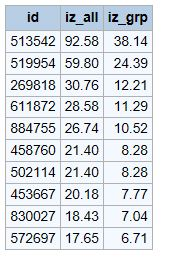

In [50]:
 Image(filename='Anaconda3\\output\\income_zcore_table.JPG') 

 ## Top/Bottom N processing

Start by defining a function with 3 argument values.  First one is positional (df) followed by two named arguments (n=, and sort_col=).  The function returns a Series of n= values in descending sort order.

In [51]:
def topn(df, n=3, sort_col='income'):
    return pd.Series(df[sort_col]).sort_values(ascending=False).head(n)

Call the 'topn' function.

In [52]:
topn(loans, sort_col='dti', n=5)

id
793919                  29.99
234391                  29.96
289144                  29.95
754868                  29.95
831945                  29.93
Name: dti, dtype: float64

The function can be applied to levels of a GroupBy object using the .apply() attribute.

In [53]:
loans.groupby('grade').apply(topn)

grade  id    
A      611872           1,900,000.00
       458760           1,440,000.00
       453667           1,362,000.00
B      519954           3,900,000.00
       624215             984,000.00
       643926             948,000.00
C      513542           6,000,000.00
       269818           2,039,784.00
       884755           1,782,000.00
D      603818           1,200,000.00
       514680             840,000.00
       752994             648,000.00
E      792270             750,000.00
       565565             700,053.85
       508436             660,000.00
F      502114           1,440,000.00
       473872             600,000.00
       843071             350,000.00
G      989796             725,000.00
       391263             600,000.00
       115363             500,000.00
Name: income, dtype: float64

Not surprisingly, we did not need to create this function since the .nlargest() and .nsmallest() attributes performs the same operation.

In [54]:
grp_grd['income'].nlargest(3)

grade  id    
A      611872           1,900,000.00
       458760           1,440,000.00
       453667           1,362,000.00
B      519954           3,900,000.00
       624215             984,000.00
       643926             948,000.00
C      513542           6,000,000.00
       269818           2,039,784.00
       884755           1,782,000.00
D      603818           1,200,000.00
       514680             840,000.00
       752994             648,000.00
E      792270             750,000.00
       565565             700,053.85
       508436             660,000.00
F      502114           1,440,000.00
       473872             600,000.00
       843071             350,000.00
G      989796             725,000.00
       391263             600,000.00
       115363             500,000.00
Name: income, dtype: float64

Return the 3 smallest income values for each debt-to-income loans['dti_cat'] column levels.

In [55]:
grp_grd['income'].nsmallest(3)

grade  id     
A      288342                3,300.00
       228954                3,500.00
       398765                5,500.00
B      139940                2,000.00
       267670                3,600.00
       524201                4,080.00
C      434740                4,000.00
       99987                 4,000.00
       503299                4,200.00
D      91126                 4,000.00
       565967                4,800.00
       521396                6,000.00
E      367694                4,200.00
       403941                4,800.00
       388623                5,843.00
F      119948                7,280.00
       1000862               9,960.00
       708331               12,000.00
G      123688                1,896.00
       108473                9,600.00
       387462               10,000.00
Name: income, dtype: float64

## Resources

The GroupBy: split-apply-combine for panda is located <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html"> here</a>.

Apply Operations to Groups in Pandas, by Chris Albon, located <a href="http://chrisalbon.com/python/pandas_apply_operations_to_groups.html"> here.</a>

GroupBy-fu: improvements in grouping and aggregating data in pandas, by Wes McKinney, located <a href="http://wesmckinney.com/blog/groupby-fu-improvements-in-grouping-and-aggregating-data-in-pandas/"> here</a>.

MERGING vs. JOINING: Comparing the DATA Step with SQL, by Malachy J. Foley, University of North Carolina at Chapel Hill, located <a href="http://www2.sas.com/proceedings/sugi30/249-30.pdf"> here</a>.

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/">Return to Chapter List</a>